## Data

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.inspection import permutation_importance
import collections
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
df = pd.read_csv('/Users/aliciaremontospina/code/AlcaRmsp/the_laundromat/raw_data/data.csv')

df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [3]:
df['errorBalanceOrig']=df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest']=df['newBalanceDest'] + df['amount'] - df['oldBalanceDest']

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

# Fit it
ordinal_encoder.fit(df[["type"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df["type"] = ordinal_encoder.transform(df[["type"]])

[array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
       dtype=object)]

In [5]:
# perform one-hot encoding on type column
df = pd.get_dummies(df, columns=['type'])

In [6]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply the label encoder to non-numeric columns
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [7]:
df.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_0.0,type_1.0,type_2.0,type_3.0,type_4.0
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0.0,9839.64,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0.0,1864.28,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0.0,181.00,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0.0,-21001.00,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0.0,11668.14,0,0,0,1,0


### Split data

In [8]:
# Separate the features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing data

### SMOTE

In [10]:
# #Check if data is balanced before SMOTE
# labels = 'Not Fraud','Fraud'
# values=df['isFraud'].value_counts()
# fig, ax = plt.subplots()
# ax.pie(values, labels=labels)

In [11]:
# print(imblearn.__version__)

In [12]:
# # summarize class distribution
# counter = collections.Counter(y)
# print(counter)

In [13]:
# X_train.shape, y_train.shape

In [14]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)

In [15]:
# X_resampled_SMOTE.head()

In [16]:
# X_resampled_SMOTE.shape, y_resampled_SMOTE.shape

In [17]:
# pd.DataFrame(y_resampled_SMOTE)

#We only added isFraud back in to see what the distribution looks like

In [18]:
## SMOTE training set

In [19]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)

In [20]:
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

([<matplotlib.patches.Wedge at 0x145354580>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

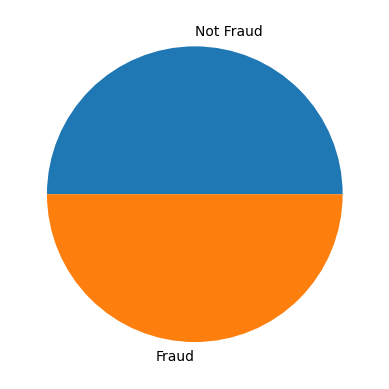

In [21]:
#Check if data is balanced after SMOTE balancing
labels = 'Not Fraud','Fraud'
values=X_resampled_SMOTE['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [22]:
## SMOTE on test set

In [23]:
X_test_resampled_SMOTE, y_test_resampled_SMOTE = SMOTE(sampling_strategy= 0.6).fit_resample(X_test, y_test)

In [24]:
X_test_resampled_SMOTE.shape, y_test_resampled_SMOTE.shape

((2033446, 16), (2033446,))

### ADASYN

In [25]:
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)

In [26]:
X_resampled_ADASYN['isFraud'] = y_resampled_ADASYN

([<matplotlib.patches.Wedge at 0x135f70730>,
 [Text(-7.724207452182517e-05, 1.099999997288028, 'Not Fraud'),
  Text(7.713908508922867e-05, -1.0999999972952552, 'Fraud')])

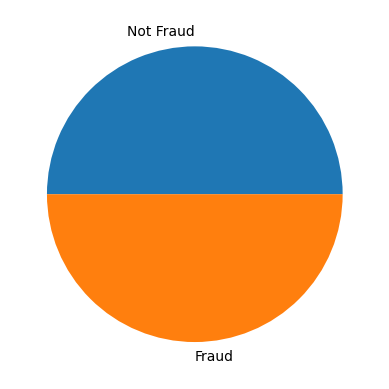

In [27]:
#Check if data is balanced after ADASYN balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled_ADASYN['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

## Modelling

In [28]:
logreg = LogisticRegression()

In [29]:
X_resampled_SMOTE.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_0.0,type_1.0,type_2.0,type_3.0,type_4.0,isFraud
0,619,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,0,772770.15,0.00,1,0,0,0,0,0
1,164,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,0,424917.56,0.00,1,0,0,0,0,0
2,382,19967.60,5870502,3634.00,0.00,1346491,0.00,0.00,0,16333.60,19967.60,0,0,0,1,0,0
3,180,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,0,347400.51,1055233.02,0,1,0,0,0,0
4,36,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,0,206067.85,412135.69,0,0,0,0,1,0


## Resampling

In [30]:
# # Train the model on the Training data
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

In [31]:
# y_pred = log_model_SMOTE.predict(X_test)

In [32]:
fraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 1].sample(10000)
notfraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 0].sample(10000)
data_new_sample = pd.concat([fraud, notfraud], axis=0)


In [33]:
data_new_sample.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_0.0,type_1.0,type_2.0,type_3.0,type_4.0,isFraud
6381643,383,8.627951e+04,2022088,8.627951e+04,0.0,556230,0.000000e+00,0.000000e+00,0,0.0,8.627951e+04,0,0,0,0,1,1
6067756,662,3.143967e+06,530026,3.143967e+06,0.0,553350,8.947996e+04,3.233447e+06,0,0.0,6.287933e+06,0,1,0,0,0,1
9937880,353,9.439099e+04,1221524,9.439099e+04,0.0,361421,4.844045e+06,4.938436e+06,0,0.0,1.887820e+05,0,1,0,0,0,1
7435669,421,1.041590e+05,2569649,1.041590e+05,0.0,525214,2.378955e+04,1.279486e+05,0,0.0,2.083181e+05,0,1,0,0,0,1
5338830,278,2.363268e+05,892825,2.363268e+05,0.0,353430,0.000000e+00,2.363268e+05,0,0.0,4.726536e+05,0,1,0,0,0,1


In [34]:
X_resampled_SMOTE_data_new_sample = data_new_sample.drop('isFraud', axis=1)

In [35]:
y_resampled_SMOTE_data_new_sample = data_new_sample['isFraud']

## Modelling

### Logistic regression using SMOTE data

In [36]:
logreg = LogisticRegression()

In [37]:
# Train the model on the Training data
log_model_SMOTE = logreg.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample)

In [38]:
y_pred = log_model_SMOTE.predict(X_test_resampled_SMOTE)


In [39]:
# Score the model on the Test data
recall = recall_score(y_test_resampled_SMOTE, y_pred)
print("Recall SMOTE:", recall)


Recall SMOTE: 0.9424687427053199


### Feature selection on SMOTE data

In [41]:
permutation_score = permutation_importance(log_model_SMOTE, X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease'] 
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

,feature,score_decrease
7,newBalanceDest,0.18686
1,amount,0.17324
10,errorBalanceDest,0.13389
6,oldBalanceDest,0.087
4,newBalanceOrig,0.08131
9,errorBalanceOrig,0.07338
3,oldBalanceOrig,0.06794
5,nameDest,0.04009
2,nameOrig,0.00195
0,step,0.0


### Logistic Regression using ADASYN data

In [ ]:
# X_resampled_ADASYN = X_resampled_ADASYN.drop('isFraud', axis=1)

In [ ]:
# # Train the model on the Training data
# log_model_ADASYN = logreg.fit(X_resampled_ADASYN, y_resampled_ADASYN)

In [ ]:
# y_pred = log_model_ADASYN.predict(X_test)

In [ ]:
# # Score the model on the Test data
# recall = recall_score(y_test, y_pred)
# print("Recall ADASYN:", recall)

### Feature selection on ADASYN

In [ ]:
# permutation_score = permutation_importance(log_model_ADASYN, X_resampled_SMOTE, y_resampled_SMOTE, n_repeats=10, scoring = 'recall') # Perform Permutation"
# importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
# importance_df.columns=['feature','score_decrease']
# importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

### SVM Classifcation Model

#### SMOTE

In [42]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [ ]:
classifier.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample) # Then we train our model, with our balanced data train.

In [ ]:
prediction_SVM_all = classifier.predict(X_test_resampled_SMOTE) #We predict our data test.

In [ ]:
#Looking at Gamma for curvature in decision boundary
#Apply SVM model using most commom kernel functions: Gaussian radial basis function (RBF)

rbf_svc=SVC(kernel='rbf').fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample)
y_pred = rbf_svc.predict(X_test_resampled_SMOTE)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test_resampled_SMOTE, y_pred)))

In [ ]:
cm = confusion_matrix(y_test_resampled_SMOTE, y_pred) #predicted positives/negatives vs actual positives/negatives
plot_confusion_matrix(cm,class_names)